# **Asignacion 2**
Grupo 1:

Maria Jose Perez

Camilo Murcia

Jurianny Andica

Parámetro de impacto b =  0.50000
Energía de colisión E =  1.00000
Distancia de acercamiento r0 =  0.77942


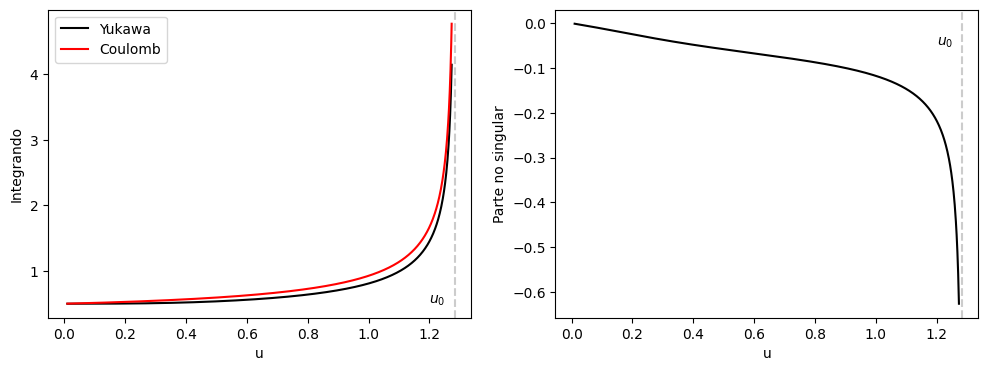

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Parámetros para el potencial
# Fuerza de la interacción
k = 1
# Rango
a = 1

# Definir los integrandos.
# Los parámetros dinámicos b y E deben estar definidos antes de llamarlos
# Integrando para el potencial Yukawa
def fY(u):
    return b / np.sqrt(1 - b**2 * u**2 - u * k * np.exp(-a/(u)) / E)

# Integrando para el potencial Coulomb
def fC(u):
    return b / np.sqrt(1 - b**2 * u**2 - u * k * np.exp(-a/(u0)) / E)

# Diferencia entre los integrandos
def df(u):
    return fY(u) - fC(u)

# Inversa de la distancia de acercamiento más cercana
def umax(q):
    def f(u):
        return 1 - b**2 * u**2 - u * k * np.exp(-a/(u)) / E
    return newton(f, q)

# Establecer el parámetro de impacto
b = 0.5 * a
print("Parámetro de impacto b = {0:8.5f}".format(b))
# Establecer la energía de colisión
E = 1
print("Energía de colisión E = {0:8.5f}".format(E))
# Encontrar la distancia de acercamiento más cercana
u0 = umax(b)
print("Distancia de acercamiento r0 = {0:8.5f}".format(1/u0))

# Establecer el número de puntos de datos
N = 1000

# Establecer los puntos de evaluación (evitar el error de división por cero)
u = np.linspace(0.01, u0 - 0.01, N)

# Crear las gráficas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(u, fY(u), '-k', label="Yukawa")
plt.plot(u, fC(u), '-r', label="Coulomb")
plt.xlabel("u")
plt.ylabel("Integrando")
plt.axvline(x=u0, color='0.8', linestyle='--')
plt.text(1.2, 0.5, r"$u_0$")
plt.legend(loc=2)

plt.subplot(1, 2, 2)
plt.plot(u, fY(u) - fC(u), '-k')
plt.xlabel("u")
plt.ylabel("Parte no singular")
plt.axvline(x=u0, color='0.8', linestyle='--')
plt.text(1.2, -0.05, r"$u_0$")

plt.show()


# **Caso Angulo dispersion.**

    Fuerza del potencial k= 1.00000
Longitud de decaimiento del potencial a= 1.00000
             Energía de colisión E= 1.00000


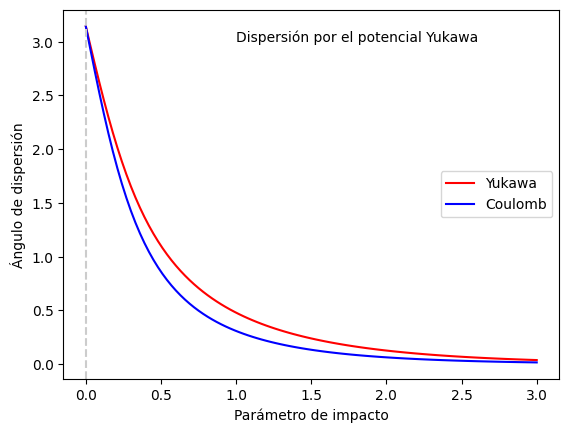

In [91]:
from scipy.integrate import simpson

# Establecer parámetros de impacto
s = np.linspace(0.0, 3.0, 101)

# Preparar el ángulo como un arreglo
thetaY = []
thetaC = []

# Colisión frontal (b=0)
thetaY.append(np.pi)
thetaC.append(np.pi)

# Para b > 0
for i in range(1, 101):
    b = s[i]
    u0 = umax(b)
    u = np.linspace(0.0, u0, N)

    # Evitar la división por cero en u=0 y u=u0
    u[0] = 0.05
    u[N-1] = u0 - 0.05
    f = df(u)

    # Ingresar los valores correctos en u=0 y u=u0
    f[0] = 0
    u[0] = 0
    f[N-1] = 0.0
    u[N-1] = u0

    # Evaluar la parte no singular
    dphi = simpson(f, x=u)

    # Ángulo de dispersión para el potencial Coulomb
    C = k * np.exp(-a / ( u0))
    phiC = np.pi / 2 - np.arctan(C / (2 * b * E))

    # Ángulo de dispersión del potencial Yukawa
    phiY = phiC + dphi

    # Obtener theta a partir de phi
    thetaY.append(np.pi - 2 * phiY)
    thetaC.append(np.pi - 2 * phiC)

print("    Fuerza del potencial k={0:8.5f}".format(k))
print("Longitud de decaimiento del potencial a={0:8.5f}".format(a))
print("             Energía de colisión E={0:8.5f}".format(E))

plt.plot(s, thetaY, '-r', label="Yukawa")
plt.plot(s, thetaC, '-b', label="Coulomb")
plt.xlabel("Parámetro de impacto")
plt.ylabel("Ángulo de dispersión")
plt.axvline(x=0, color='0.8', linestyle='--')
plt.text(1.0, 3.0, "Dispersión por el potencial Yukawa")
plt.legend(loc=5)
plt.show()
